# sequence degrees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_csv = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/train.csv"
val_csv = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/val.csv"
test_csv = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/test.csv"

train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# remove negative samples
pos_train_df = train_df[train_df['label'] == 1]
pos_val_df = val_df[val_df['label'] == 1]
pos_test_df = test_df[test_df['label'] == 1]

# remove positive samples
neg_train_df = train_df[train_df['label'] == 0]
neg_val_df = val_df[val_df['label'] == 0]
neg_test_df = test_df[test_df['label'] == 0]

/tmp/ipykernel_122686/4134521879.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv)


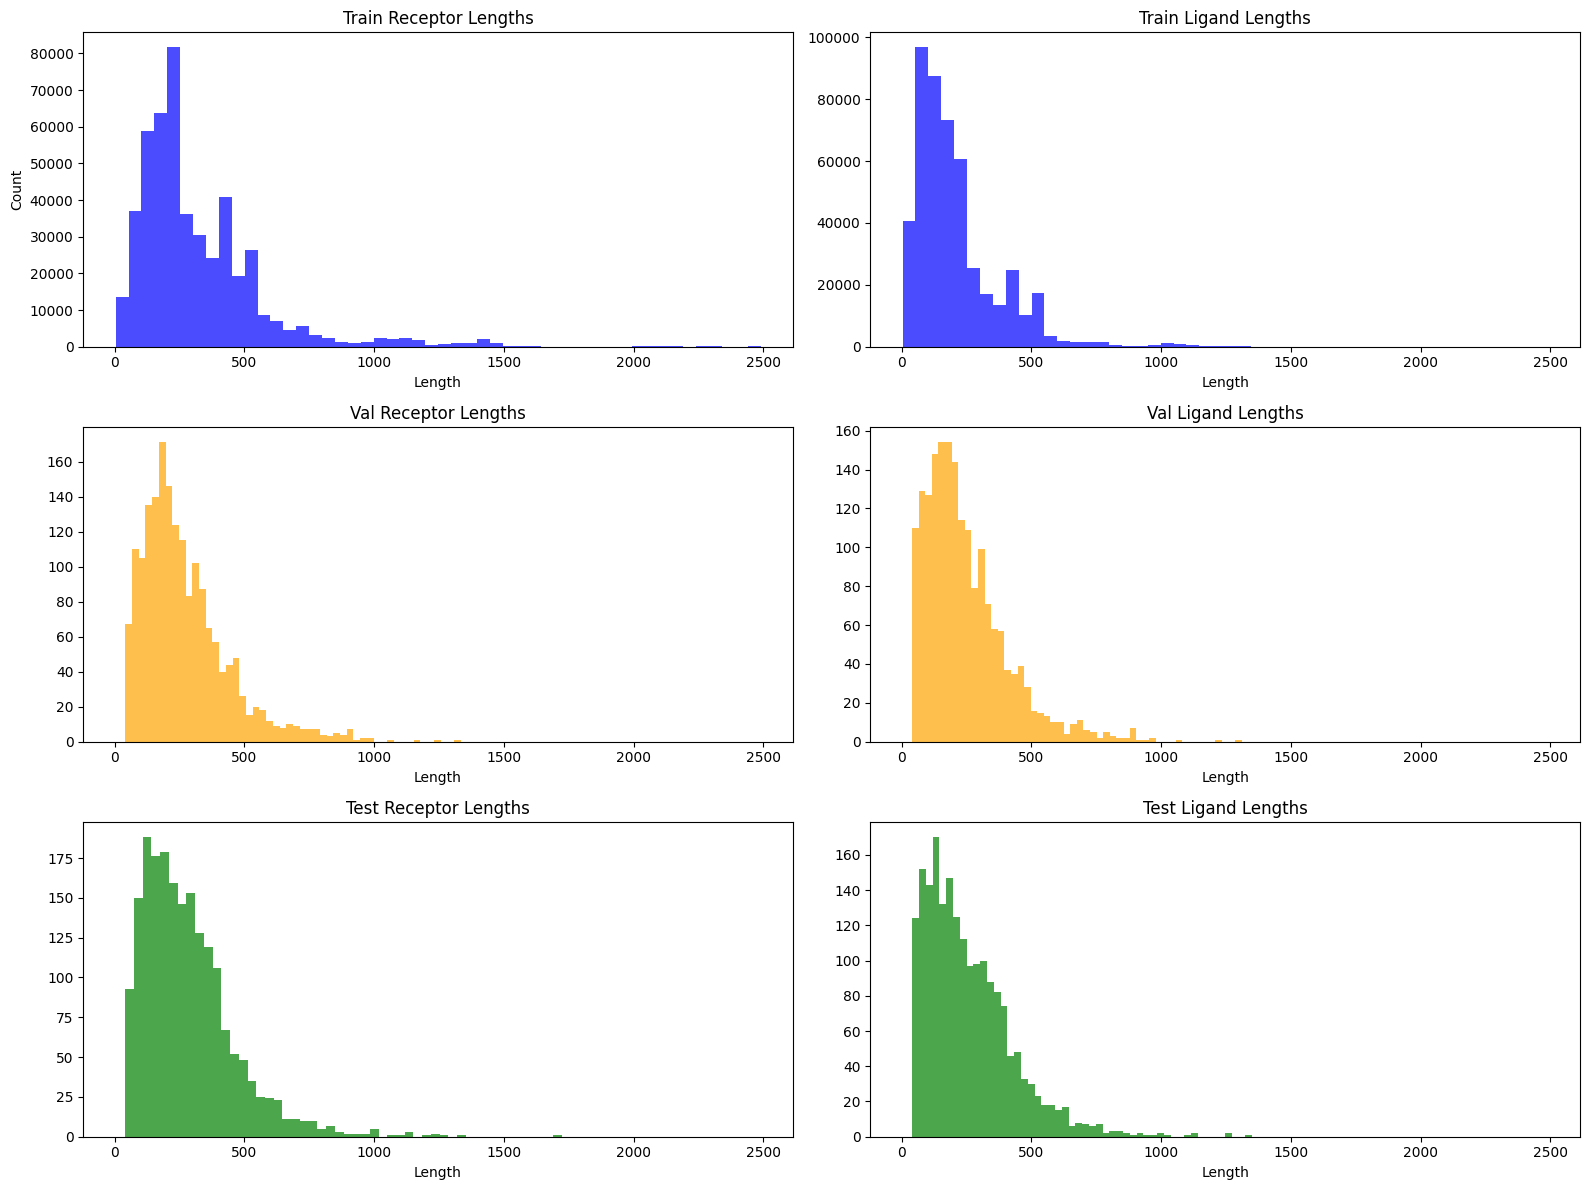

In [8]:

# Calculate sequence lengths
train_receptor_lens = train_df['receptor_seq'].str.len()
train_ligand_lens = train_df['ligand_seq'].str.len()
val_receptor_lens = val_df['receptor_seq'].str.len()
val_ligand_lens = val_df['ligand_seq'].str.len()
test_receptor_lens = test_df['receptor_seq'].str.len()
test_ligand_lens = test_df['ligand_seq'].str.len()

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharey=False, sharex=True)

# Train
axes[0, 0].hist(train_receptor_lens, bins=50, color='blue', alpha=0.7)
axes[0, 0].set_title('Train Receptor Lengths')
axes[0, 0].set_xlabel('Length')
axes[0, 0].set_ylabel('Count')

axes[0, 1].hist(train_ligand_lens, bins=50, color='blue', alpha=0.7)
axes[0, 1].set_title('Train Ligand Lengths')
axes[0, 1].set_xlabel('Length')

# Validation
axes[1, 0].hist(val_receptor_lens, bins=50, color='orange', alpha=0.7)
axes[1, 0].set_title('Val Receptor Lengths')
axes[1, 0].set_xlabel('Length')

axes[1, 1].hist(val_ligand_lens, bins=50, color='orange', alpha=0.7)
axes[1, 1].set_title('Val Ligand Lengths')
axes[1, 1].set_xlabel('Length')

# Test
axes[2, 0].hist(test_receptor_lens, bins=50, color='green', alpha=0.7)
axes[2, 0].set_title('Test Receptor Lengths')
axes[2, 0].set_xlabel('Length')

axes[2, 1].hist(test_ligand_lens, bins=50, color='green', alpha=0.7)
axes[2, 1].set_title('Test Ligand Lengths')
axes[2, 1].set_xlabel('Length')

# ensure every subplot shows its x‐tick labels even though sharex=True
for ax in axes.flatten():
    ax.tick_params(axis='x', labelbottom=True)

plt.tight_layout()
plt.show()

# raw sequence degrees

In [ ]:
train_seqs = pd.concat([train_df['receptor_seq'], train_df['ligand_seq']])
val_seqs = pd.concat([val_df['receptor_seq'], val_df['ligand_seq']])
test_seqs = pd.concat([test_df['receptor_seq'], test_df['ligand_seq']])

train_seq_counts = train_seqs.value_counts().head(20)
val_seq_counts = val_seqs.value_counts().head(20)
test_seq_counts = test_seqs.value_counts().head(20)

print("Top 20 sequences in train set:\n", train_seq_counts)
print("Top 20 sequences in validation set:\n", val_seq_counts)
print("Top 20 sequences in test set:\n", test_seq_counts)


Top 20 sequences in train set:
 TFNDVKTSLGITESYDIVNAIRNSQGDNFKSYVPLATANNVAEVGAGILINQTVQNDFITSLVDRIGLVVIRQVSLNNPLKKFKKGQIPLGRTIEEIYTDITKEKQYDAEEAEQKVFEREMPNVKTLFHERNRQGFYHQTIQDDSLKTAFVSWGNFESFVSSIINAIYNSAEVDEYEYMKLLVDNYYSKGLFTTVKIDEPTSSTGALTEFVKKMRATARKLTLPQGSRDWNSMAVRTRSYMEDLHLIIDADLEAELDVDVLAKAFNMNRTDFLGNVTVIDGFASTGLEAVLVDKDWFMVYDNLHKMETVRNPRGLYWNYYYHVWQTLSVSRFANAVAFVSGDVPAVTQVIVSPNIAAVKQGGQQQFTAYVRATNAKDHKVVWSVEGGSTGTAITGDGLLSVSGNEDNQLTVKATVDIGTEDKPKLVVGEAVVSIRPNNASGGAQA                                                                                   5721
SDPSSINGGIVVAMTGKDCVAIACDLRLGSQSLGVSNKFEKIFHYGHVFLGITGLATDVTTLNEMFRYKTNLYKLKEERAIEPETFTQLVSSSLYERRFGPYFVGPVVAGINSKSGKPFIAGFDLIGCIDEAKDFIVSGTASDQLFGMCESLYEPNLEPEDLFETISQALLNAADRDALSGWGAVVYIIKKDEVVKRYLKMRQD                                                                                                                                                                                                                                       

/tmp/ipykernel_2143069/1061360435.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


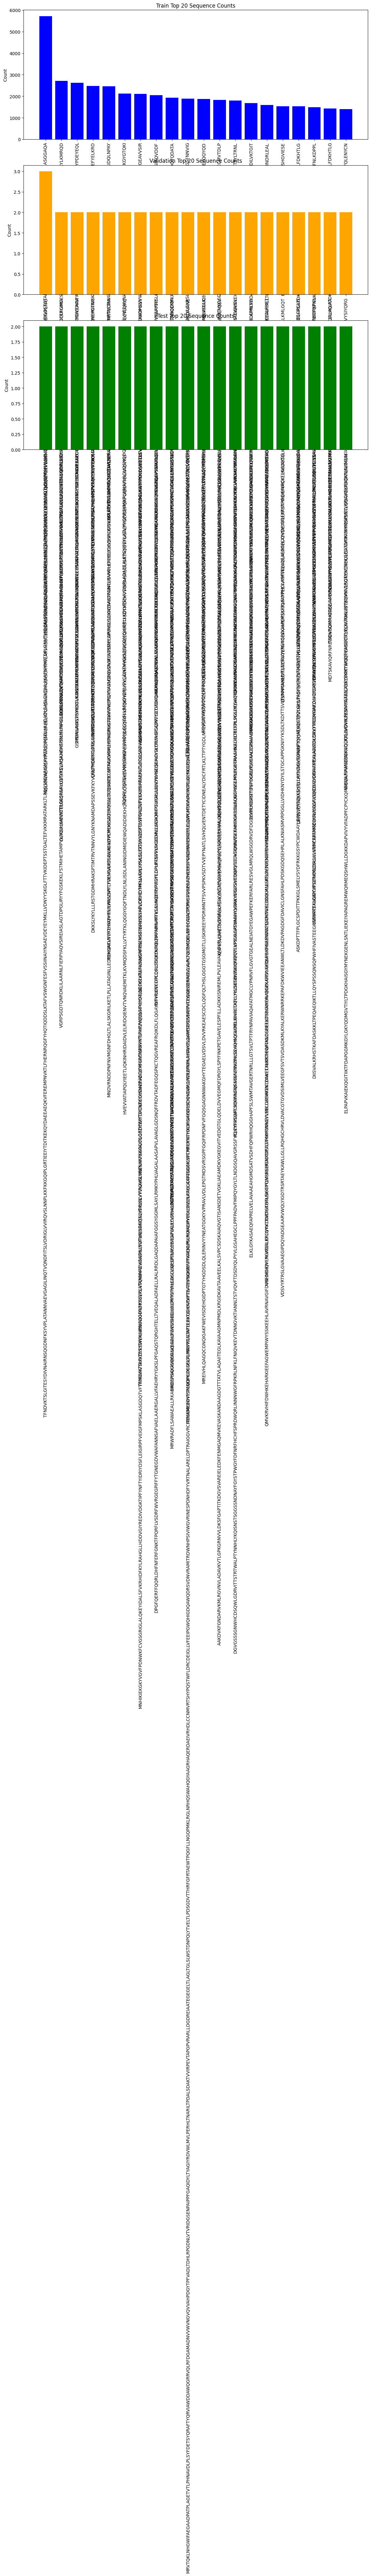

In [11]:
# Plot top 20 sequence counts per split
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=False)

# Train
axes[0].bar(train_seq_counts.index, train_seq_counts.values, color='blue')
axes[0].set_title('Train Top 20 Sequence Counts')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Validation
axes[1].bar(val_seq_counts.index, val_seq_counts.values, color='orange')
axes[1].set_title('Validation Top 20 Sequence Counts')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Test
axes[2].bar(test_seq_counts.index, test_seq_counts.values, color='green')
axes[2].set_title('Test Top 20 Sequence Counts')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Test sequence degree after negative sampling

In [6]:
train_csv = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/train.csv"
val_csv = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/val.csv"
test_csv = "/nfs/scratch/pinder/negative_dataset/my_repository/datasets/deleak_uniprot/deleak_cdhit/test.csv"

train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# remove negative samples
pos_train_df = train_df[train_df['label'] == 1]
pos_val_df = val_df[val_df['label'] == 1]
pos_test_df = test_df[test_df['label'] == 1]

# remove positive samples
neg_train_df = train_df[train_df['label'] == 0]
neg_val_df = val_df[val_df['label'] == 0]
neg_test_df = test_df[test_df['label'] == 0]

/tmp/ipykernel_122686/2538742677.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv)


In [9]:
pos_train_seqs = pd.concat([pos_train_df['receptor_seq'], pos_train_df['ligand_seq']])
pos_val_seqs = pd.concat([pos_val_df['receptor_seq'], pos_val_df['ligand_seq']])
pos_test_seqs = pd.concat([pos_test_df['receptor_seq'], pos_test_df['ligand_seq']])

neg_train_seqs = pd.concat([neg_train_df['receptor_seq'], neg_train_df['ligand_seq']])
neg_val_seqs = pd.concat([neg_val_df['receptor_seq'], neg_val_df['ligand_seq']])
neg_test_seqs = pd.concat([neg_test_df['receptor_seq'], neg_test_df['ligand_seq']])

pos_train_seqs_counts = pos_train_seqs.value_counts().head(5)
pos_val_seqs_counts = pos_val_seqs.value_counts().head(5)
pos_test_seqs_counts = pos_test_seqs.value_counts().head(5)

neg_train_seqs_counts = neg_train_seqs.value_counts().head(5)
neg_val_seqs_counts = neg_val_seqs.value_counts().head(5)
neg_test_seqs_counts = neg_test_seqs.value_counts().head(5)

print("Positive train sequences counts:")
print(pos_train_seqs_counts)
print("Negative train sequences counts:")
print(neg_train_seqs_counts)
print("Positive validation sequences counts:")
print(pos_val_seqs_counts)
print("Negative validation sequences counts:")
print(neg_val_seqs_counts)
print("Positive test sequences counts:")
print(pos_test_seqs_counts)
print("Negative test sequences counts:")
print(neg_test_seqs_counts)

Positive train sequences counts:
TFNDVKTSLGITESYDIVNAIRNSQGDNFKSYVPLATANNVAEVGAGILINQTVQNDFITSLVDRIGLVVIRQVSLNNPLKKFKKGQIPLGRTIEEIYTDITKEKQYDAEEAEQKVFEREMPNVKTLFHERNRQGFYHQTIQDDSLKTAFVSWGNFESFVSSIINAIYNSAEVDEYEYMKLLVDNYYSKGLFTTVKIDEPTSSTGALTEFVKKMRATARKLTLPQGSRDWNSMAVRTRSYMEDLHLIIDADLEAELDVDVLAKAFNMNRTDFLGNVTVIDGFASTGLEAVLVDKDWFMVYDNLHKMETVRNPRGLYWNYYYHVWQTLSVSRFANAVAFVSGDVPAVTQVIVSPNIAAVKQGGQQQFTAYVRATNAKDHKVVWSVEGGSTGTAITGDGLLSVSGNEDNQLTVKATVDIGTEDKPKLVVGEAVVSIRPNNASGGAQA    5721
SDPSSINGGIVVAMTGKDCVAIACDLRLGSQSLGVSNKFEKIFHYGHVFLGITGLATDVTTLNEMFRYKTNLYKLKEERAIEPETFTQLVSSSLYERRFGPYFVGPVVAGINSKSGKPFIAGFDLIGCIDEAKDFIVSGTASDQLFGMCESLYEPNLEPEDLFETISQALLNAADRDALSGWGAVVYIIKKDEVVKRYLKMRQD                                                                                                                                                                                                                                                     2719
TSIMAVTFKDGVILGADSRTTTGAYIANRVTDKLTRVHDKIWCCRSGSAADTQAIADIV

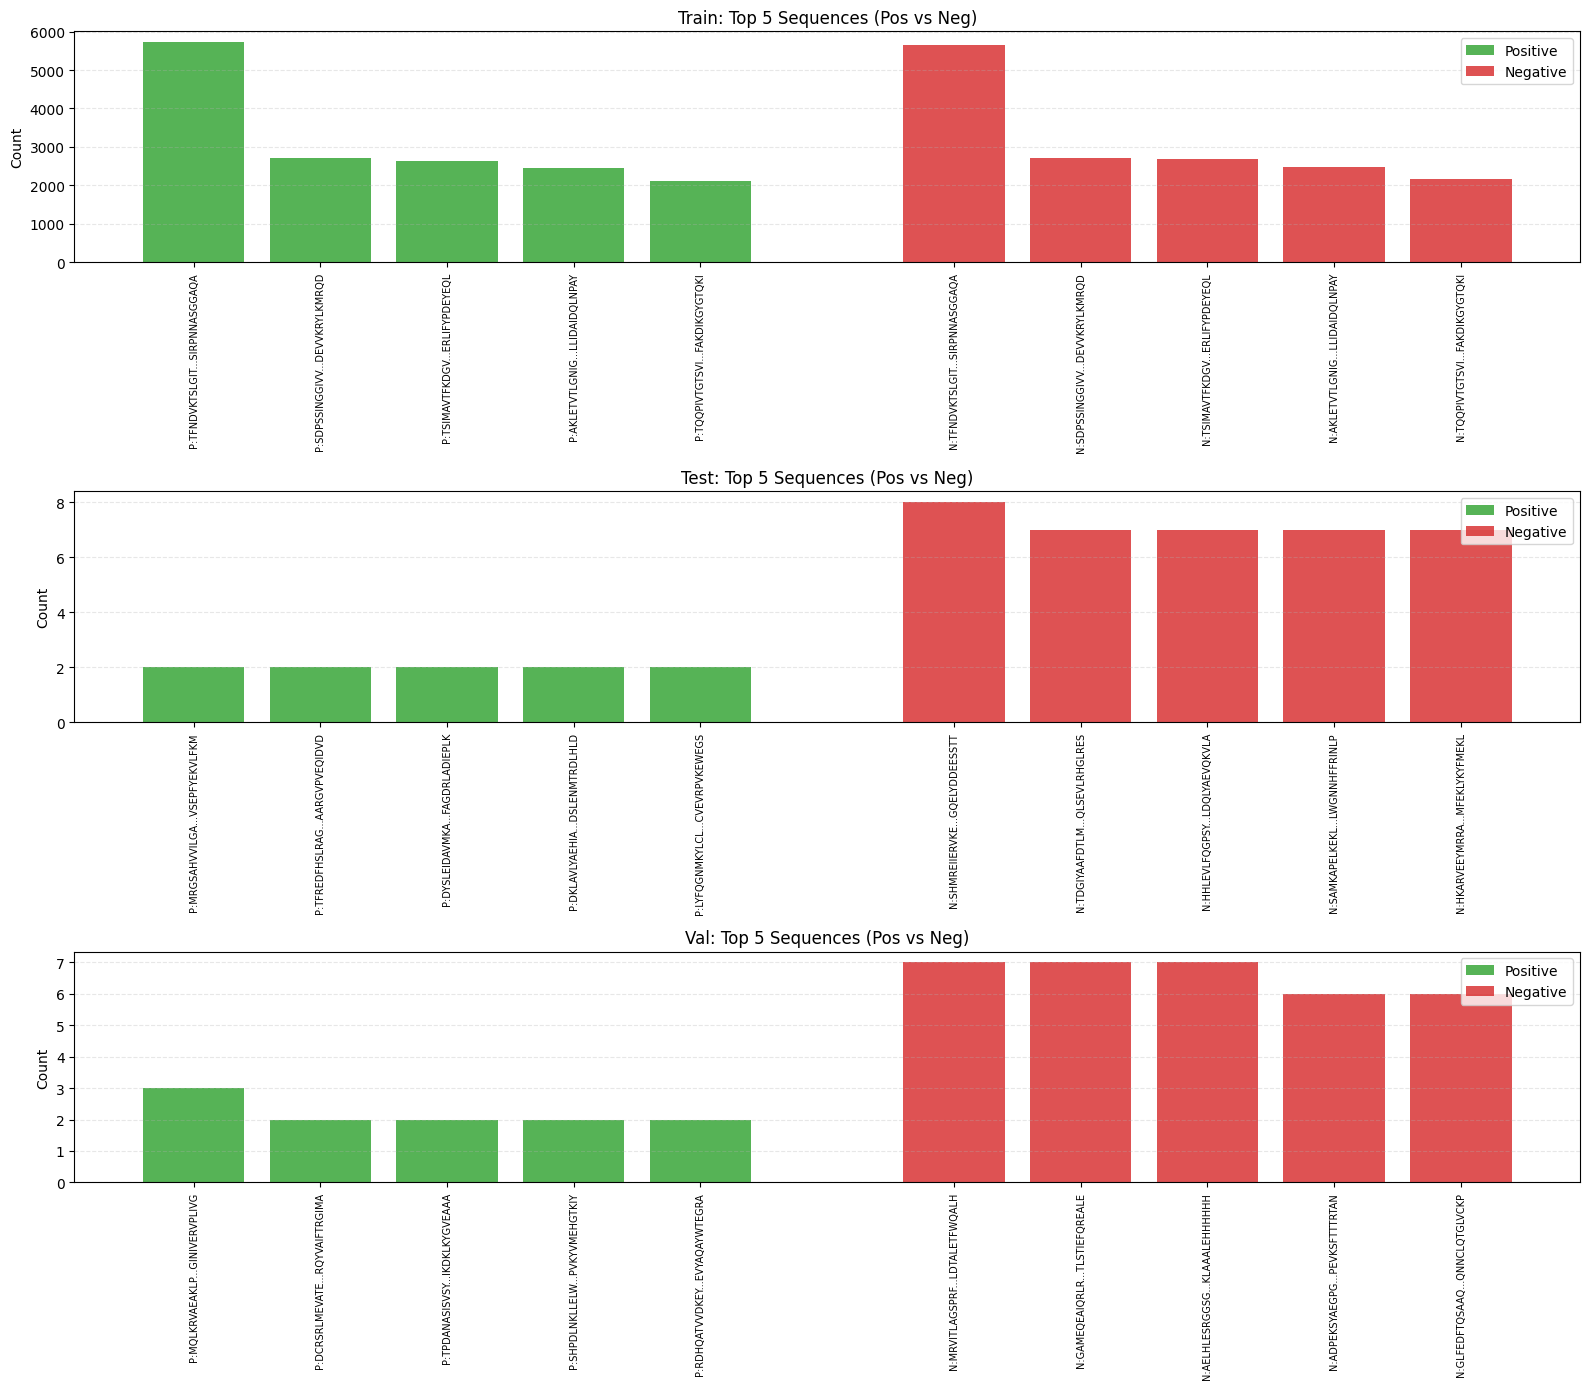

In [10]:
# Plot top 5 sequences for train, test, and val with pos/neg in the same axes
def _short_label(seq, max_len=28):
    if len(seq) <= max_len:
        return seq
    keep = max_len - 3
    head = keep // 2
    tail = keep - head
    return f"{seq[:head]}...{seq[-tail:]}"

def _plot_split(ax, pos_counts, neg_counts, title):
    # Ensure descending order
    pos_counts = pos_counts.sort_values(ascending=False)
    neg_counts = neg_counts.sort_values(ascending=False)

    n_pos = len(pos_counts)
    n_neg = len(neg_counts)

    # Positions (leave a gap between groups)
    x_pos = list(range(n_pos))
    gap = 1
    x_neg = list(range(n_pos + gap, n_pos + gap + n_neg))

    # Bars
    ax.bar(x_pos, pos_counts.values, color='tab:green', alpha=0.8, label='Positive')
    ax.bar(x_neg, neg_counts.values, color='tab:red', alpha=0.8, label='Negative')

    # Ticks and labels
    xticks = x_pos + x_neg
    xlabels = [f"P:{_short_label(s)}" for s in pos_counts.index] + [f"N:{_short_label(s)}" for s in neg_counts.index]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=90, fontsize=7)

    # Titles and grid
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    # Legend (only once per axes)
    ax.legend(loc='upper right')

fig, axes = plt.subplots(3, 1, figsize=(16, 14), sharex=False)

_plot_split(axes[0], pos_train_seqs_counts, neg_train_seqs_counts, 'Train: Top 5 Sequences (Pos vs Neg)')
_plot_split(axes[1], pos_test_seqs_counts,  neg_test_seqs_counts,  'Test: Top 5 Sequences (Pos vs Neg)')
_plot_split(axes[2], pos_val_seqs_counts,   neg_val_seqs_counts,   'Val: Top 5 Sequences (Pos vs Neg)')

plt.tight_layout()
plt.show()

In [16]:
pos_train_seqs_counts = pos_train_seqs.value_counts()
pos_val_seqs_counts = pos_val_seqs.value_counts()
pos_test_seqs_counts = pos_test_seqs.value_counts()

neg_train_seqs_counts = neg_train_seqs.value_counts()
neg_val_seqs_counts = neg_val_seqs.value_counts()
neg_test_seqs_counts = neg_test_seqs.value_counts()

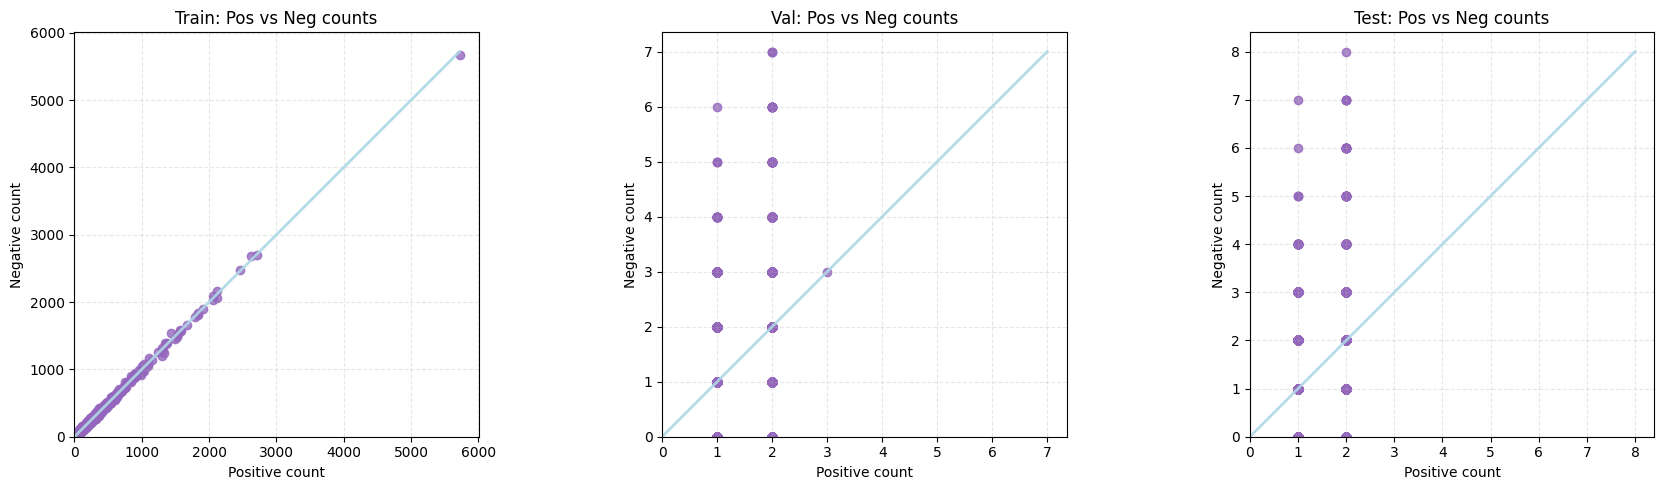

In [17]:
# Scatterplot of positive vs negative counts per split with x=y diagonal

splits = [
    ("Train", pos_train_seqs_counts, neg_train_seqs_counts),
    ("Val",   pos_val_seqs_counts,  neg_val_seqs_counts),
    ("Test",  pos_test_seqs_counts, neg_test_seqs_counts),
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False, sharey=False)

for ax, (title, pos_counts, neg_counts) in zip(axes, splits):
    # Align by sequence (union) and fill missing with 0
    df_counts = pd.concat(
        [pos_counts.rename("pos"), neg_counts.rename("neg")],
        axis=1
    ).fillna(0)

    # Scatter plot
    ax.scatter(df_counts["pos"], df_counts["neg"], color='tab:purple', alpha=0.8)

    # Diagonal x=y line
    max_val = max(df_counts["pos"].max(), df_counts["neg"].max())
    ax.plot([0, max_val], [0, max_val], color='lightblue', linewidth=2, alpha=0.9)

    ax.set_title(f"{title}: Pos vs Neg counts")
    ax.set_xlabel("Positive count")
    ax.set_ylabel("Negative count")
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, max_val * 1.05)
    ax.set_ylim(0, max_val * 1.05)

plt.tight_layout()
plt.show()

In [14]:
pos_train_seqs_counts = pos_train_seqs.value_counts().head(5)
pos_val_seqs_counts = pos_val_seqs.value_counts().head(5)
pos_test_seqs_counts = pos_test_seqs.value_counts().head(5)

neg_train_seqs_counts = neg_train_seqs.value_counts().head(5)
neg_val_seqs_counts = neg_val_seqs.value_counts().head(5)
neg_test_seqs_counts = neg_test_seqs.value_counts().head(5)

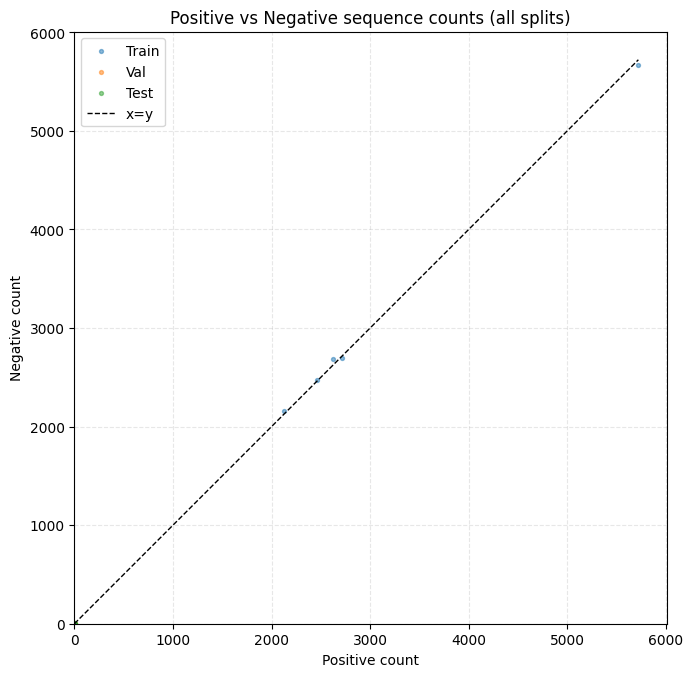

In [15]:
# Scatter plot of positive vs negative counts for all splits on one axes

split_defs = [
    ("Train", pos_train_seqs_counts, neg_train_seqs_counts),
    ("Val",   pos_val_seqs_counts,  neg_val_seqs_counts),
    ("Test",  pos_test_seqs_counts, neg_test_seqs_counts),
]

# Determine global max across splits for consistent axes and diagonal
global_max = 0
dfs = {}
for name, pos_counts, neg_counts in split_defs:
    df_counts = pd.concat(
        [pos_counts.rename("pos"), neg_counts.rename("neg")],
        axis=1
    ).fillna(0)
    dfs[name] = df_counts
    m = max(df_counts["pos"].max(), df_counts["neg"].max())
    if m > global_max:
        global_max = m

fig, ax = plt.subplots(figsize=(7, 7))
colors = {"Train": "tab:blue", "Val": "tab:orange", "Test": "tab:green"}

for name in ["Train", "Val", "Test"]:
    df_counts = dfs[name]
    ax.scatter(
        df_counts["pos"], df_counts["neg"],
        s=8, alpha=0.5, label=name, color=colors.get(name, None)
    )

# Diagonal line
ax.plot([0, global_max], [0, global_max], color="black", linestyle="--", linewidth=1, label="x=y")

ax.set_title("Positive vs Negative sequence counts (all splits)")
ax.set_xlabel("Positive count")
ax.set_ylabel("Negative count")
ax.grid(True, linestyle="--", alpha=0.3)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, global_max * 1.05)
ax.set_ylim(0, global_max * 1.05)
ax.legend()

plt.tight_layout()
plt.show()